# SBA Loan Approval Analysis & Prediction - Data Wizards

In this project, we have analysed and predicted loan approval status based on various parameters for the Small Business Administration (SBA). We use various python libraries to preprocess the dataset, and the dataset was imported from kaggle.

## Importing Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/0. Rakamin/Data Wizards/SBAnational.csv')

df = data.copy()

<ipython-input-3-7a19a462c5c4>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/0. Rakamin/Data Wizards/SBAnational.csv')


## Data Pre-Processing

Understanding the dataset and it's features and pre-processing it according to the required dataframe for model training purposes.

In [ ]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [ ]:
df.shape

(899164, 27)

Here, we notice that there are 27 different columns, and there are 899164 entries in the dataframe.

In [ ]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

Here, we notice that there are significant number of null values in the dataframe, specifically the most in ChgOffDate column.

In [ ]:
df.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)

In [ ]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
df['ApprovalFY'].apply(type).value_counts()

<class 'int'>    759570
<class 'str'>    126670
Name: ApprovalFY, dtype: int64

Here, in case of ApprovalFY, we have two dtypes: str and int

We need to convert into int dtype, so we need to check which unique values in the column has str dtype.

In [ ]:
df.ApprovalFY.unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1968', '1976A', '1969', '1995', '1970',
       '2005', '1996', '1971', 1996, 1971], dtype=object)

So, we notice that there are some rows which have the character 'A' along with the year.

In [ ]:
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x

df.ApprovalFY = df.ApprovalFY.apply(clean_str).astype('int64')

Here, we notice that several columns which need to have a specific dtype has object, which we will need to correct by setting them with their appropriate dtype.

In [ ]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].head()

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"


Here, we notice that the issue is because of the dollar symbol, because of which converts the int dtype column to object.

So we remove the symbol and convert the dtype of these columns.

In [ ]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = \
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))

Further converting the columns to their appropriate dtypes.

In [ ]:
df = df.astype({'Zip': 'str', 'NewExist': 'int64', 'UrbanRural': 'str', 'DisbursementGross': 'float', 'BalanceGross': 'float',
                          'ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

In [ ]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                   object
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist               int64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural            object
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [ ]:
df.shape

(886240, 27)

In [ ]:
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

Here, according the file that was provided along with the dataset, we map the industry code with the industry name.

In [ ]:
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

In [ ]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
Industry             198267
dtype: int64

In [ ]:
# MIS_Status
# Make Default target field based on MIS_Status where P I F = 0 and CHGOFF = 1 so we can see what features are prevalant in a defaulted loan
df['Default'] = np.where(df['MIS_Status'] == 'P I F', 0, 1)
df['Default'].value_counts()

0    730199
1    156041
Name: Default, dtype: int64

In [ ]:
df.describe(include='number')

,LoanNr_ChkDgt,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,8.862400e+05,886240.000000,886240.000000,886240.000000,886240.000000,886240.000000,886240.000000,886240.000000,886240.000000,8.862400e+05,886240.000000,8.862400e+05,8.862400e+05,8.862400e+05
mean,4.764531e+09,399251.824562,2001.149622,110.954647,11.420650,1.279900,8.463092,10.842406,2762.323810,2.021419e+05,3.032943,1.359378e+04,1.934997e+05,1.499839e+05
std,2.539319e+09,263211.592441,5.880586,78.990583,74.187995,0.451509,237.301746,237.739546,12776.276419,2.879380e+05,1452.639312,6.546616e+04,2.835053e+05,2.281694e+05
min,1.000014e+09,0.000000,1968.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,0.000000,0.000000e+00,1.000000e+03,5.000000e+02
25%,2.577612e+09,235310.000000,1997.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,4.283700e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04
50%,4.351670e+09,445310.000000,2002.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.212550e+04
75%,6.878439e+09,561740.000000,2006.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,2.400000e+05,0.000000,0.000000e+00,2.270000e+05,1.750000e+05
max,9.996003e+09,928120.000000,2014.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,1.144632e+07,996262.000000,3.512596e+06,5.000000e+06,4.500000e+06


In [ ]:
df.describe(include='object')

,Name,City,State,Zip,Bank,BankState,ApprovalDate,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,MIS_Status,Industry
count,886240,886240,886240,886240,886240,886240,886240,886240,886240,886240,160871,886240,886240,687973
unique,769838,32298,51,33501,5788,56,9786,3,18,8,6425,8435,2,20
top,SUBWAY,LOS ANGELES,CA,10001,BANK OF AMERICA NATL ASSOC,CA,7-Jul-93,1,N,N,13-Mar-10,31-Jul-95,P I F,Retail_trade
freq,1259,11467,129398,919,86075,116737,1120,465149,415439,775189,726,9747,730199,125762


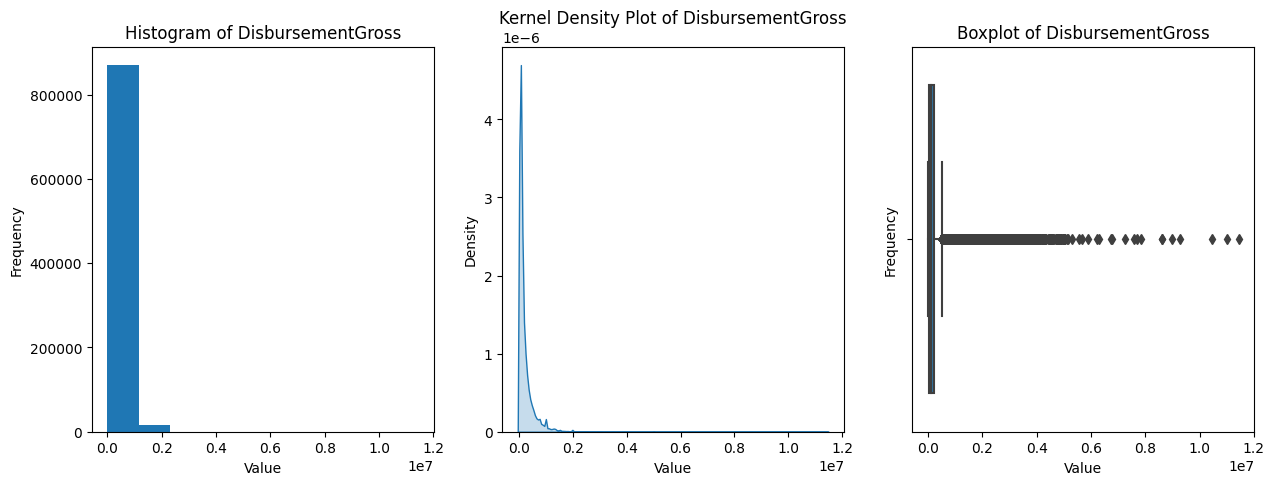

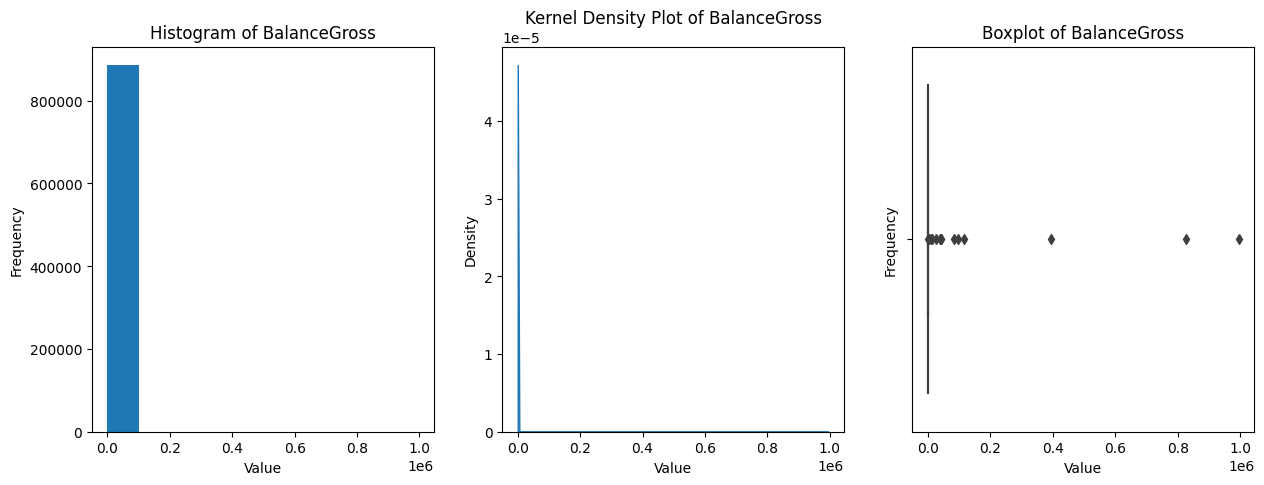

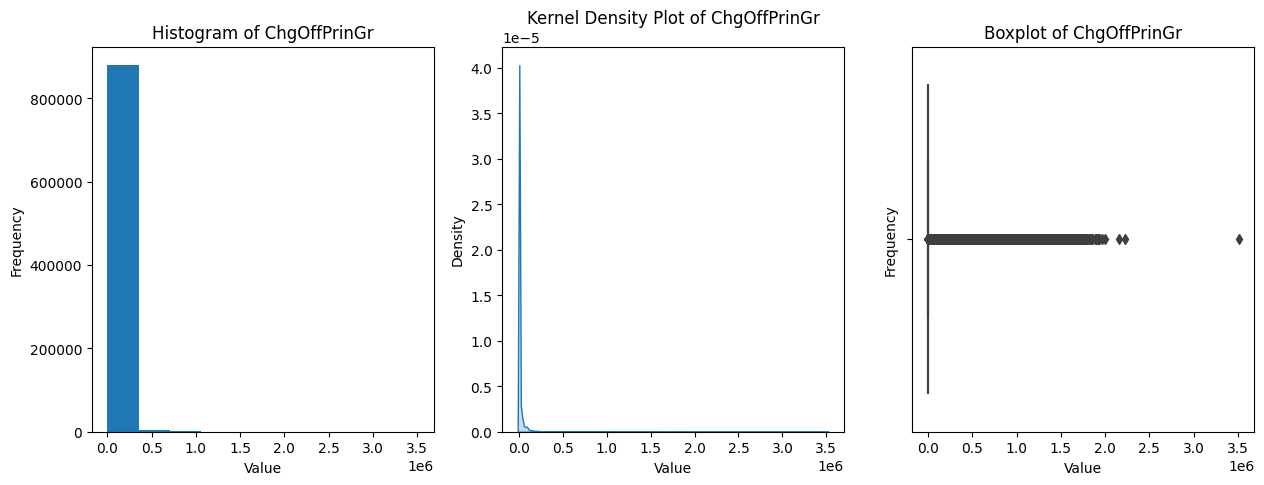

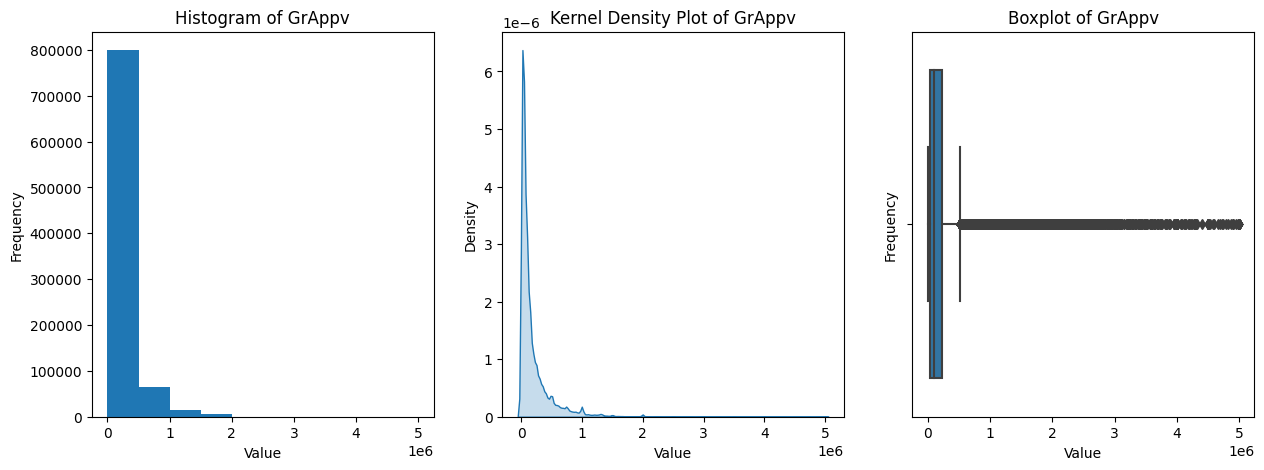

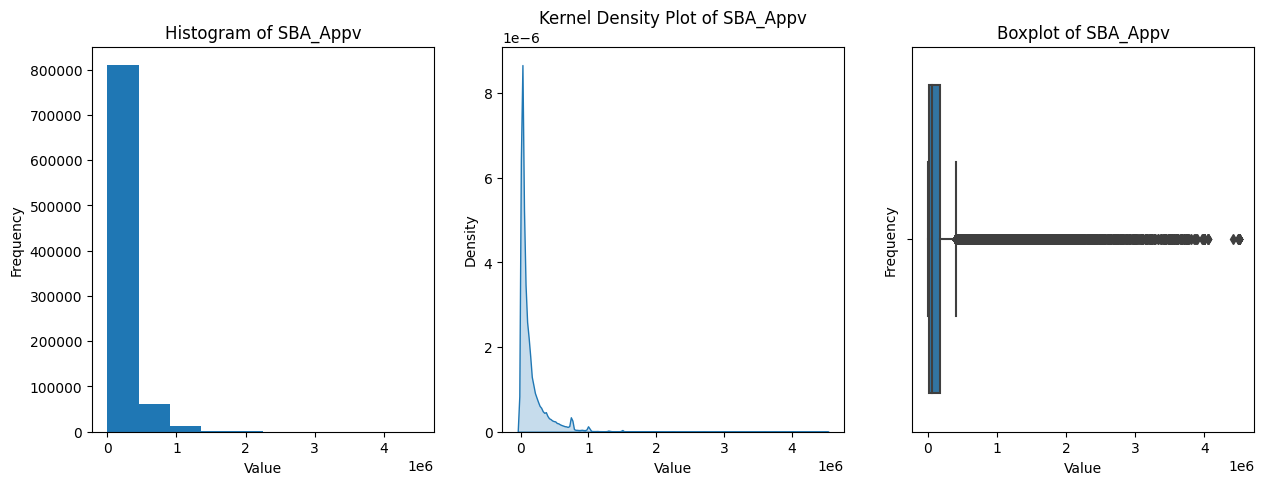

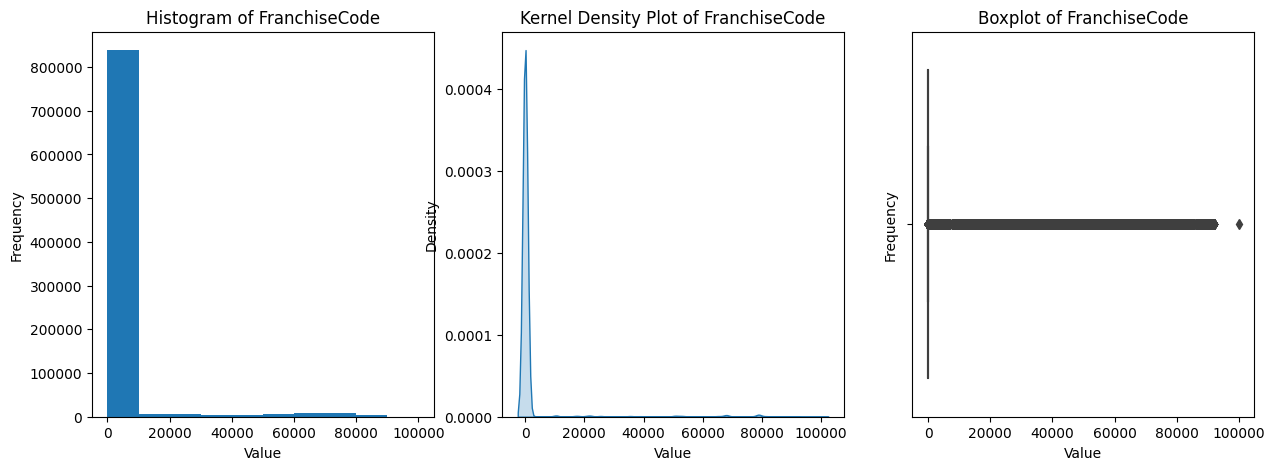

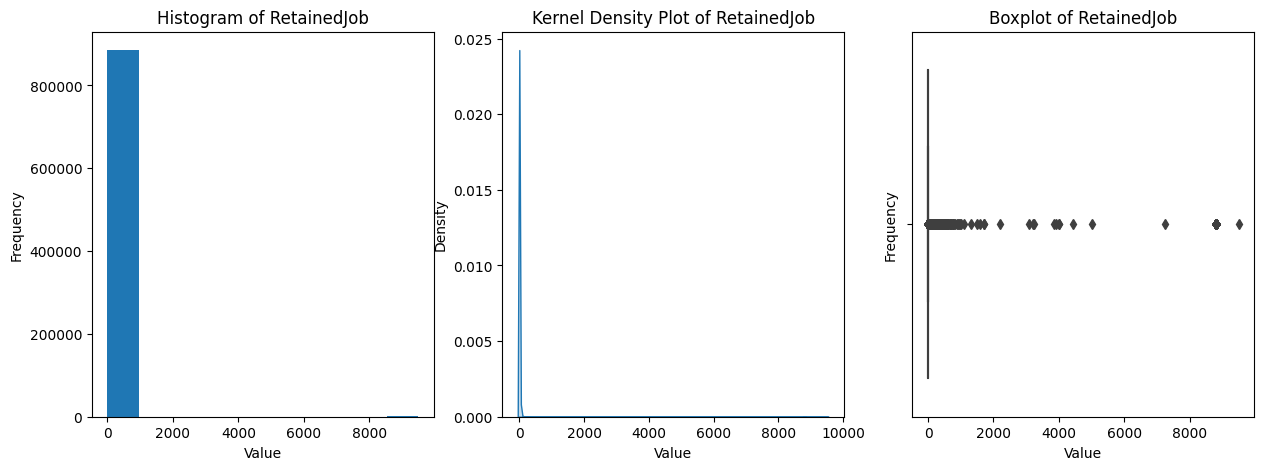

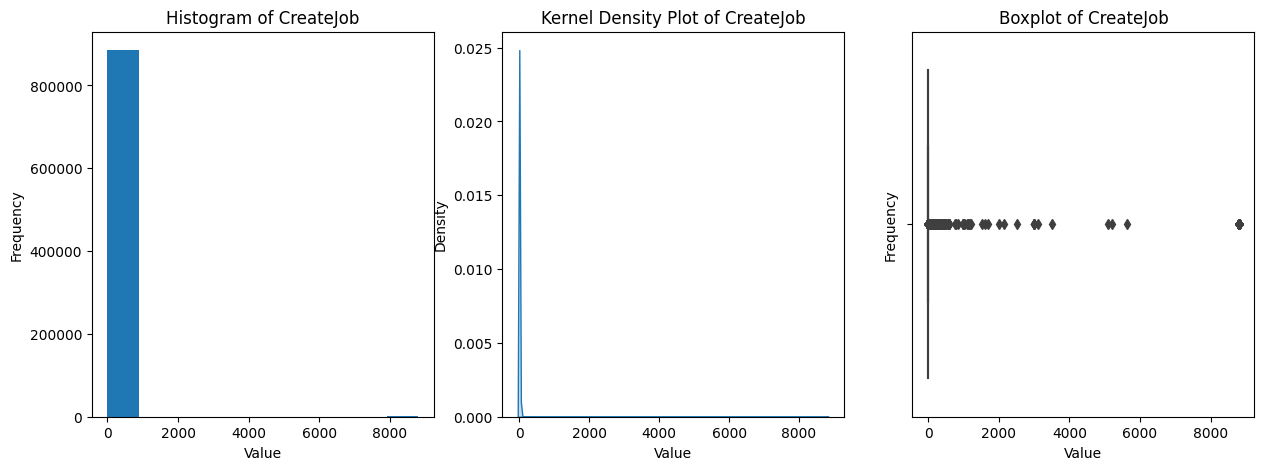

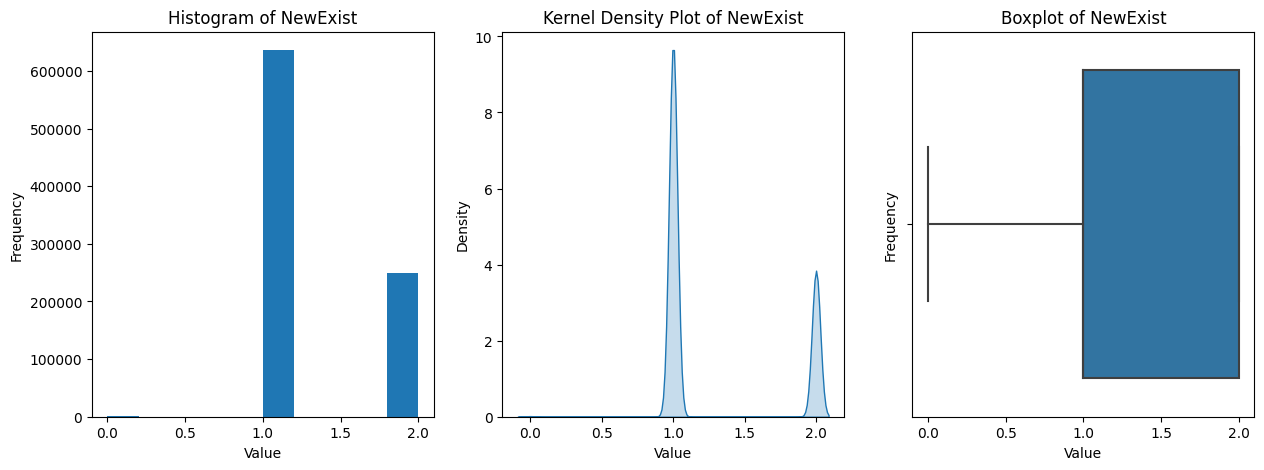

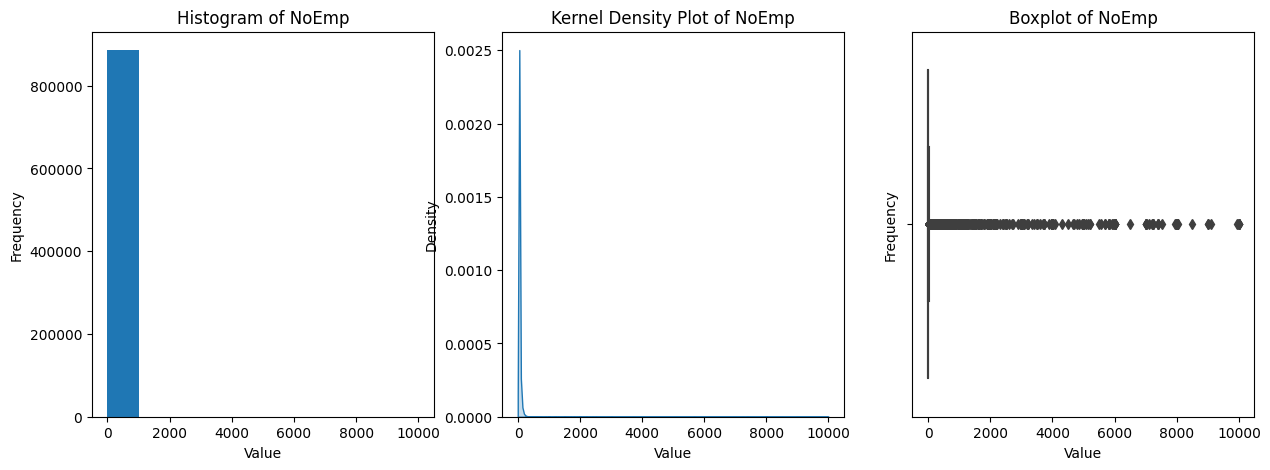

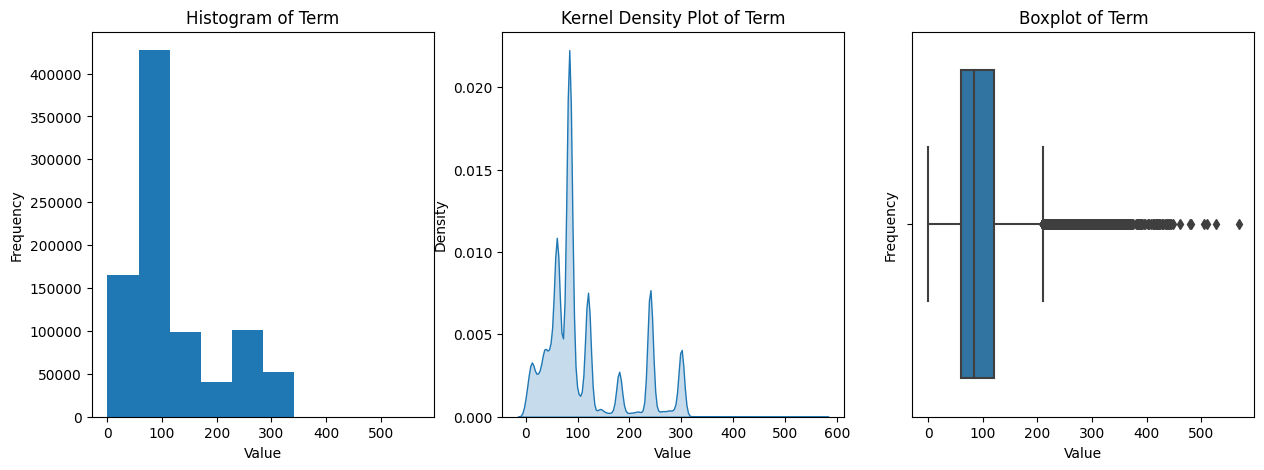

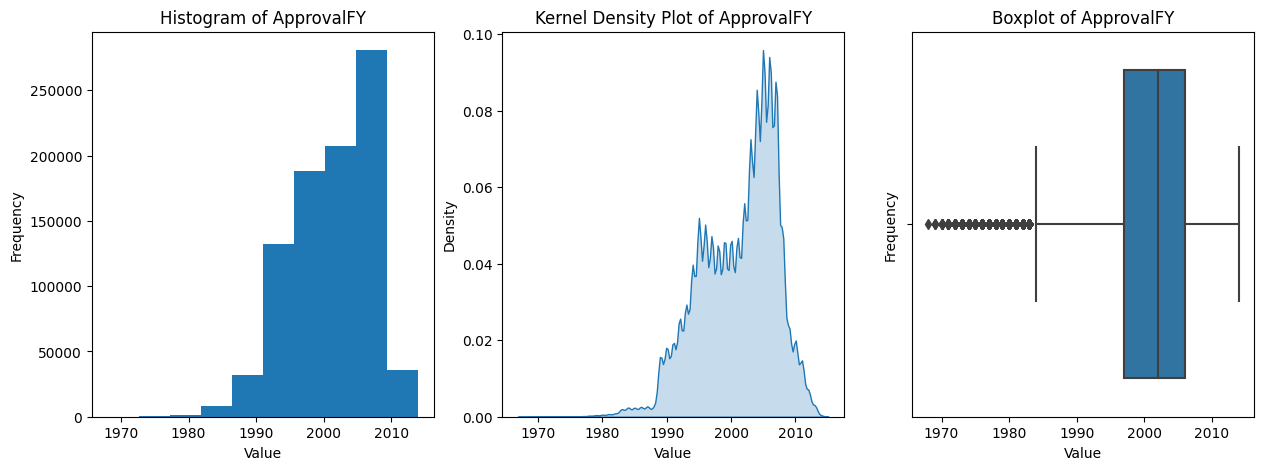

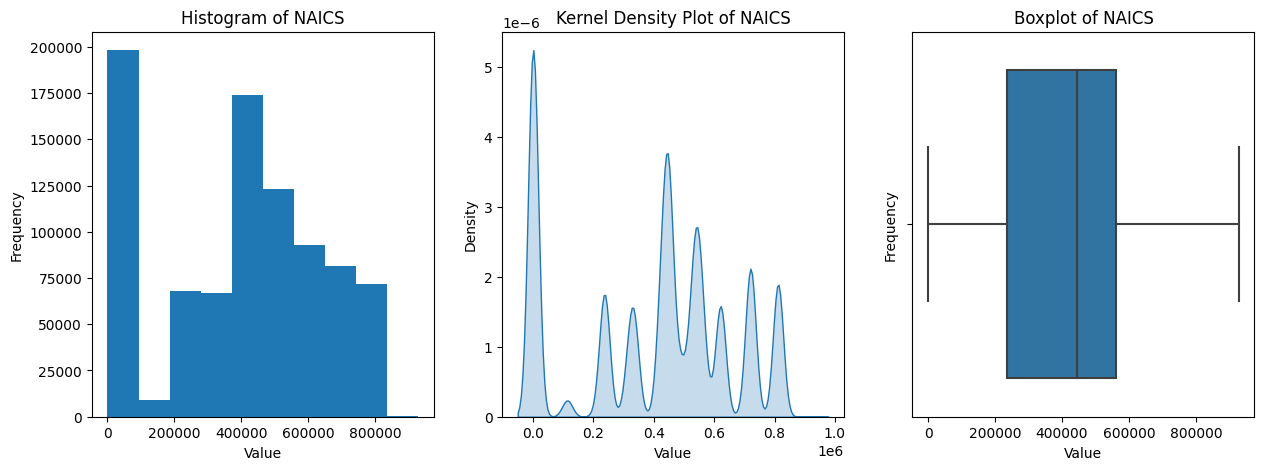

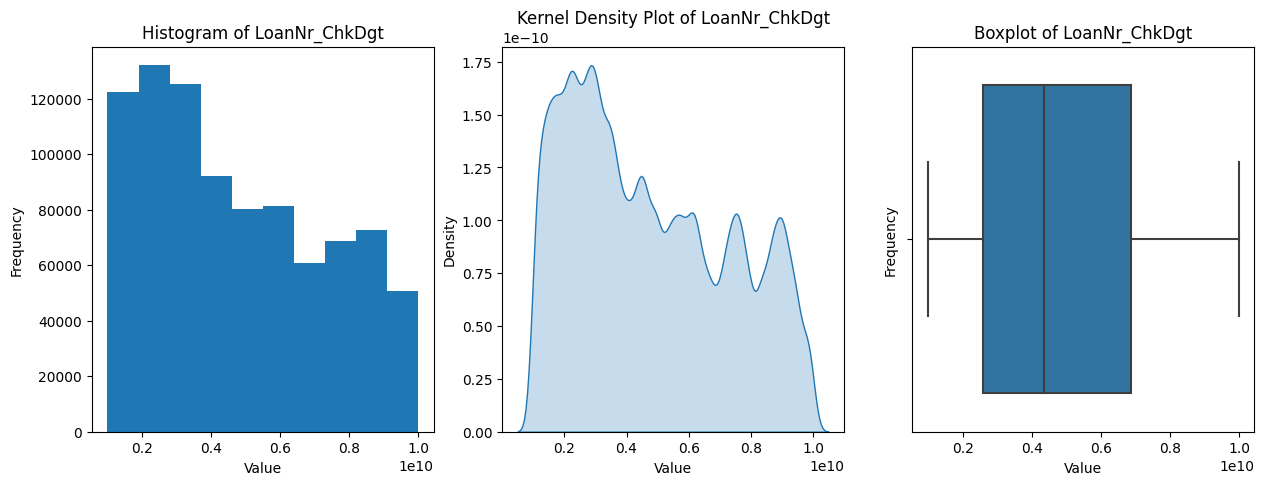

In [ ]:
df_num = df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'FranchiseCode', 'RetainedJob', 'CreateJob', 'NewExist', 'NoEmp', 'Term', 'ApprovalFY', 'NAICS', 'LoanNr_ChkDgt']]

# Assuming your DataFrame is named 'df'
for col in df_num.columns:
    # Create a figure with three subplots
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Histogram
    ax[0].hist(df_num[col], bins=10)
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Histogram of {}'.format(col))

    # Kernel Density Plot
    sns.kdeplot(df_num[col], ax=ax[1], fill = True)
    ax[1].set_xlabel('Value')
    ax[1].set_ylabel('Density')
    ax[1].set_title('Kernel Density Plot of {}'.format(col))

    # Boxplot
    sns.boxplot(x = df_num[col], ax=ax[2])
    ax[2].set_xlabel('Value')
    ax[2].set_ylabel('Frequency')
    ax[2].set_title('Boxplot of {}'.format(col))

    # Show the plots
    plt.show()

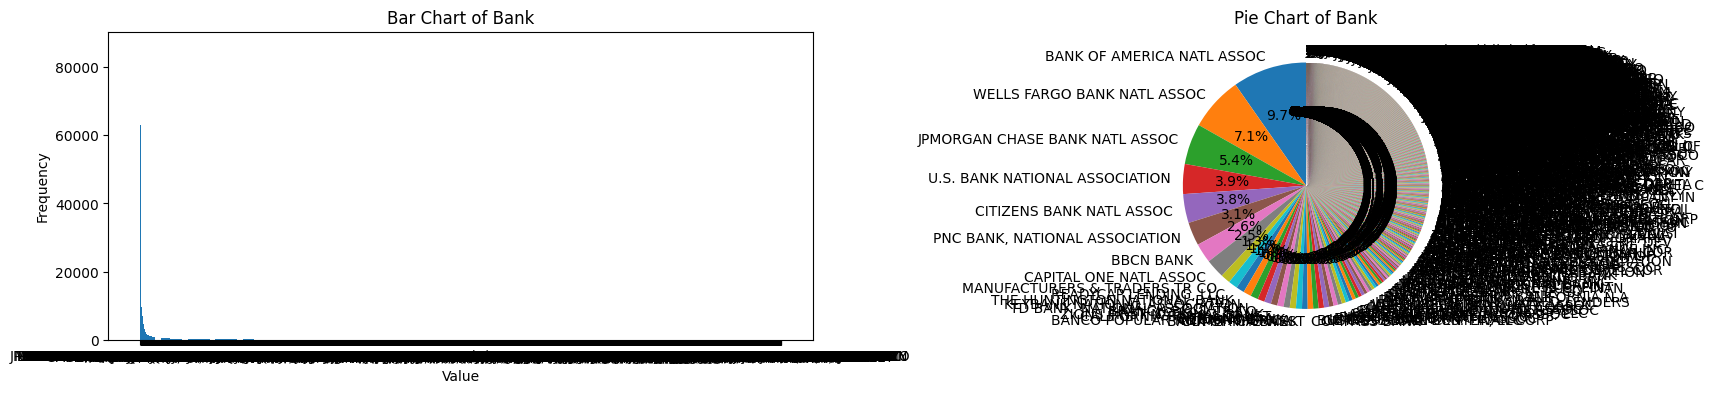

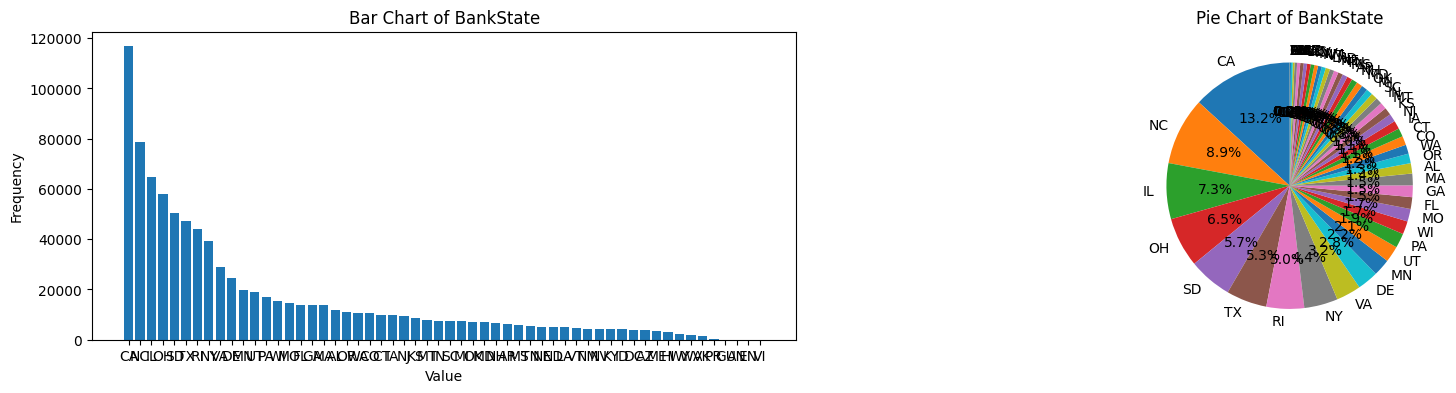

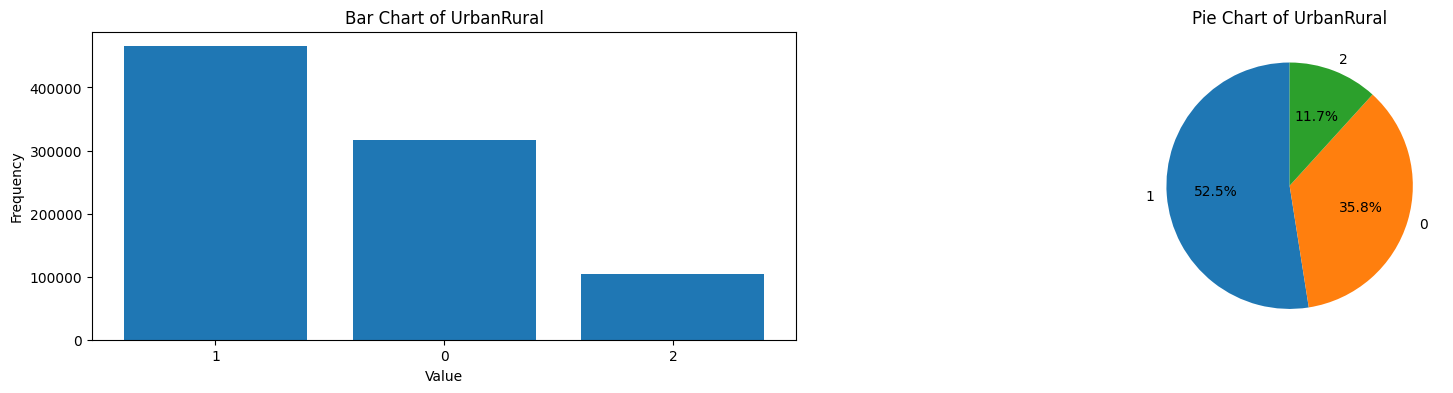

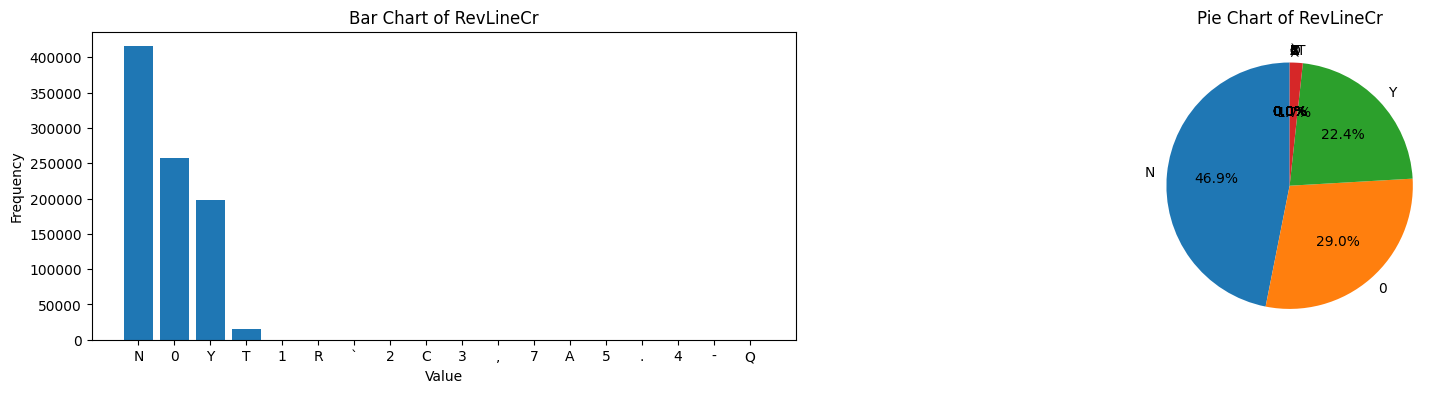

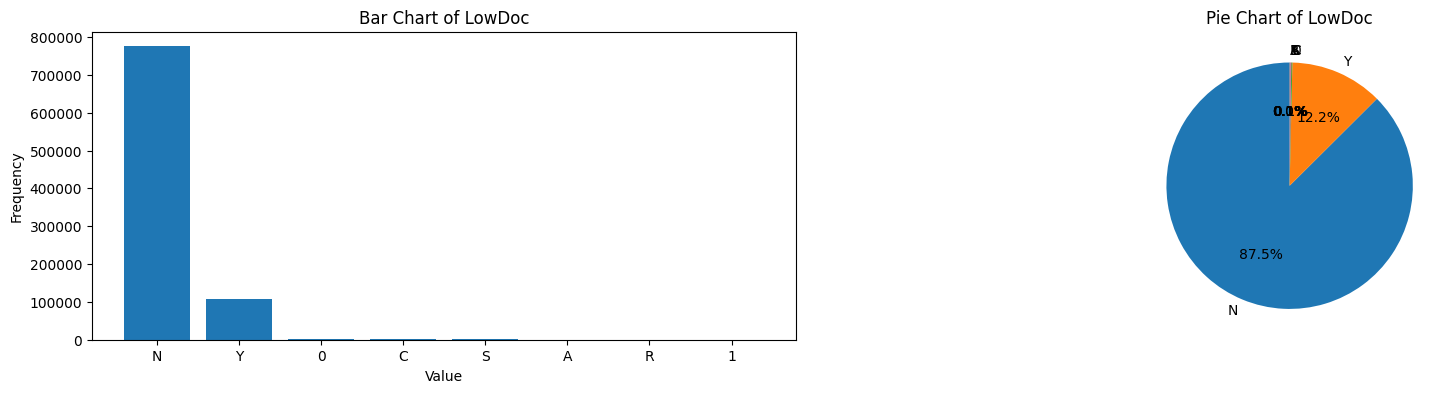

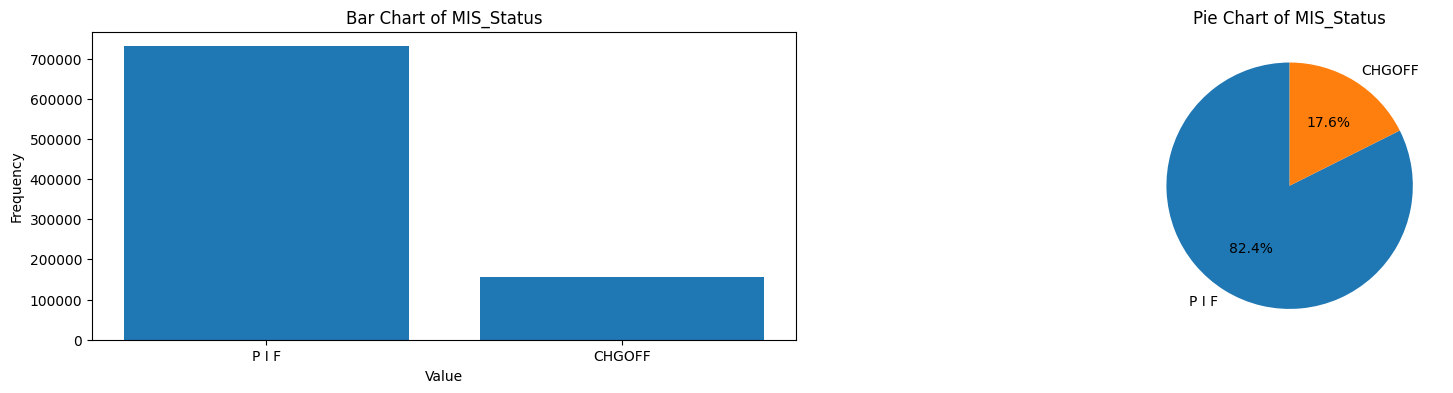

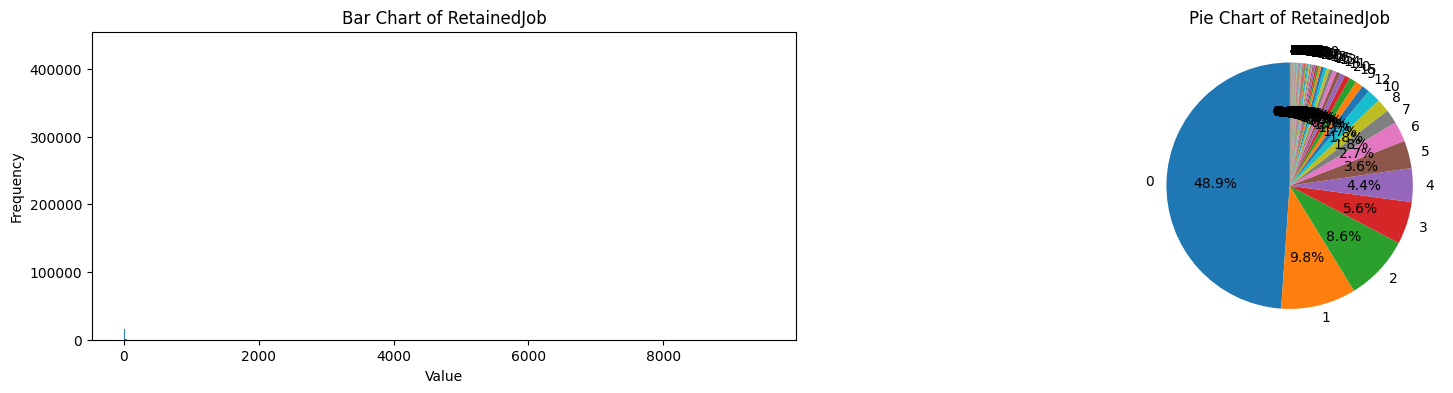

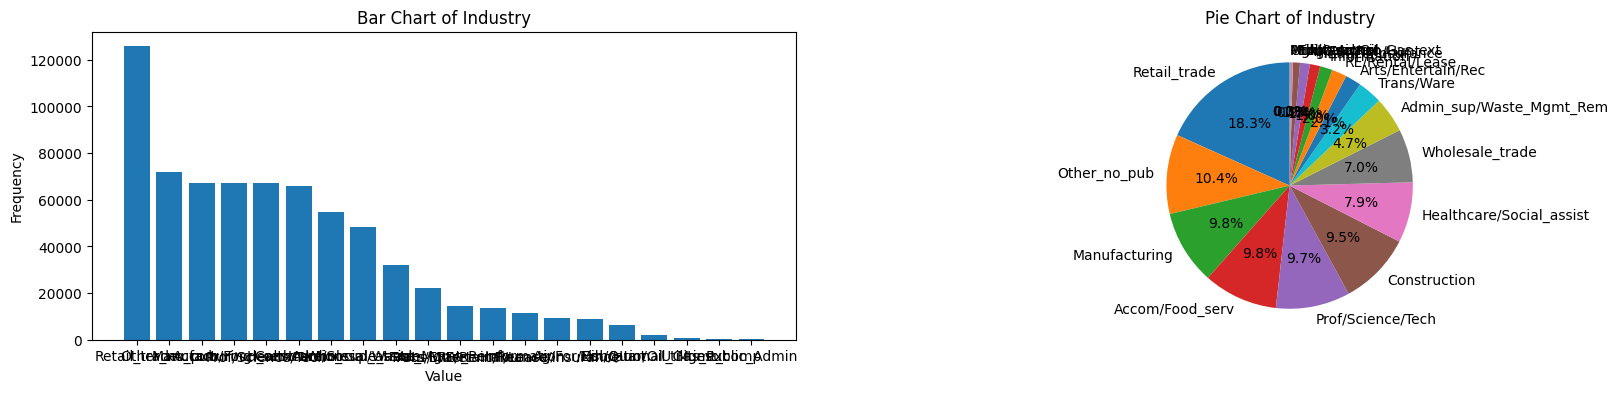

In [ ]:
df_obj = df[['Bank', 'BankState', 'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status', 'RetainedJob', 'Industry']]

# Assuming your DataFrame is named 'df'
for col in df_obj.columns:
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(20, 4))

    # Bar Chart
    counts = df_obj[col].value_counts()
    ax[0].bar(counts.index, counts.values)
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Bar Chart of {}'.format(col))

    # Pie Chart
    proportions = df_obj[col].value_counts(normalize=True)
    ax[1].pie(proportions.values, labels=proportions.index, autopct='%1.1f%%', startangle=90)
    ax[1].set_title('Pie Chart of {}'.format(col))

    # Show the plots
    plt.show()


In [ ]:
df.corr()

,LoanNr_ChkDgt,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Default
LoanNr_ChkDgt,1.000000,-0.056671,-0.195638,0.099696,0.009177,-0.040071,-0.022016,-0.023331,0.046285,0.057732,0.000595,-0.057864,0.069521,0.077922,-0.171629
NAICS,-0.056671,1.000000,0.498558,-0.111375,-0.038587,0.047139,-0.039594,-0.036836,0.028591,-0.048047,-0.000077,0.030137,-0.056916,-0.063644,0.105785
ApprovalFY,-0.195638,0.498558,1.000000,-0.295251,-0.054874,0.036261,-0.067715,-0.061085,-0.015594,-0.054511,0.001554,0.054733,-0.088336,-0.108082,0.205270
Term,0.099696,-0.111375,-0.295251,1.000000,0.046280,-0.072744,0.027602,0.024990,0.028632,0.466996,0.001706,-0.047734,0.503521,0.526511,-0.315798
NoEmp,0.009177,-0.038587,-0.054874,0.046280,1.000000,-0.040026,0.008652,0.015400,0.006371,0.088707,-0.000123,0.007806,0.090492,0.092688,-0.026167
NewExist,-0.040071,0.047139,0.036261,-0.072744,-0.040026,1.000000,-0.002179,-0.009173,0.124641,-0.074000,0.001368,0.018419,-0.066033,-0.063531,0.019671
CreateJob,-0.022016,-0.039594,-0.067715,0.027602,0.008652,-0.002179,1.000000,0.993922,0.000555,0.006877,-0.000058,0.009366,0.008122,0.013731,0.011863
RetainedJob,-0.023331,-0.036836,-0.061085,0.024990,0.015400,-0.009173,0.993922,1.000000,-0.000989,0.010293,-0.000081,0.010637,0.010729,0.014985,0.012327
FranchiseCode,0.046285,0.028591,-0.015594,0.028632,0.006371,0.124641,0.000555,-0.000989,1.000000,0.059426,-0.000203,0.025487,0.067852,0.069459,-0.015329
DisbursementGross,0.057732,-0.048047,-0.054511,0.466996,0.088707,-0.074000,0.006877,0.010293,0.059426,1.000000,0.005622,0.193055,0.971144,0.939928,-0.111058


<Axes: >

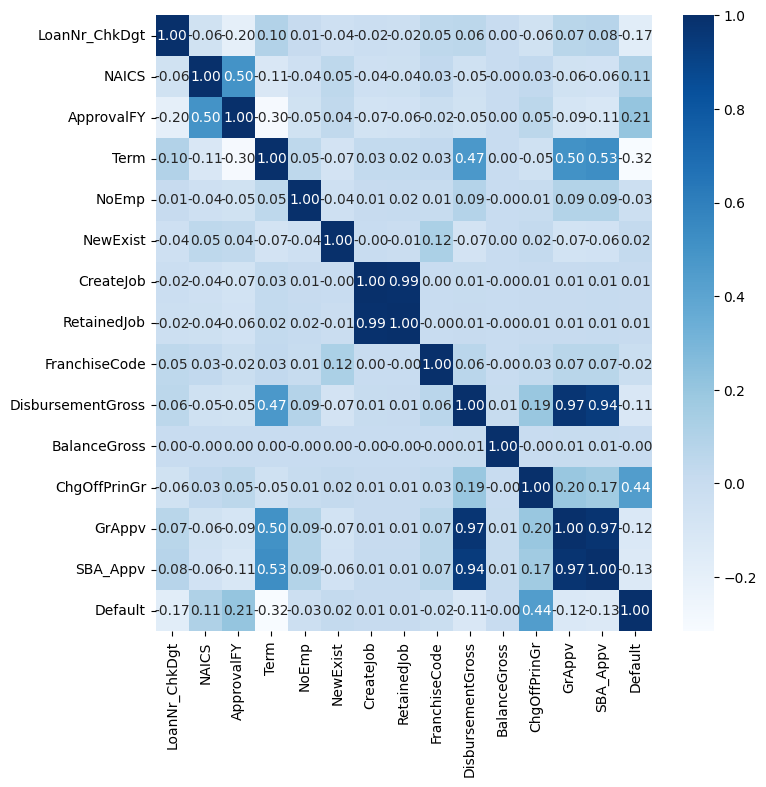

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

Some notable correlations:
* GrAppv & DisbursementGross, Positive - Makes sense that in most situations, the amount disbursed is close to what was approved
* DisbursedGreaterAppv & AppvDisbursed, Negative - Also makes sense since when the disbursed amount is greater than approved, the disbursed amount is then not equal to the approved amount
* RevLineCr & DisbursedGreaterAppv, Positive - Due to the nature of revolving lines of credit (think of it like a credit card for businesses where the business can draw funds with a limit, pays it off when able, and then draw more funds again), this makes sense that over time more funds are used then the limit set for the loan
* DisbursementFY & ApprovalFY, Positive - More often than not, the funds will be disbursed in the same year they are approved
* AppvDisbursed & RevLineCr, Negative - Typically, based on my experience underwriting loans as a Credit Analyst, the limit for a line of credit is lower than a term loan on average since the business can continually draw funds from the line of credit when needed after paying off the balance, which would explain the negative relationship.
* SBA_AppvPct & RevLineCr, Negative - SBA lines of credit can still be eligible for guarantees, however the guarantee percentage is dependant on the size of the loan.  Although this doesn't quite explain the negative relationship between SBA guarantee percentage and a loan being RevLineCr, what could is the type of SBA loan program used for the loan application. The most common used are the SBA 7(a) and SBA Express programs:

    1. SBA 7(a) program: Provides an 85% guarantee on loan amounts up to 150,000 and a 75% guarantee on loan amounts over 150,000, but require more paperwork from the SBA and the eligibility decision is typically made by the SBA; Turn around time of 5-10 days
    2. SBA Express: Max loan amount of 350,000 with a guarantee amount of 50%, however the forms required are the lender's own forms and the eligibility decision is made by the lender rather than the SBA; Turn time of about 36 hours
    
    Although this dataset unfortunately doesn't contain information on the loan program used for each loan, my assumption is that most businesses elected to use the SBA Express program for revolving lines of credit because it's easier to get loan approval and the turn time is much quicker, meaning the loan guarantee amounts for revolving lines of credit would typically be less.
    
Okay, let's look at some graphs of the data. Some ideas that come to mind are:
* Total/Average disbursed loan amount by industry
* Average days to disbursement by industry
* Number of paid in full and defaulted loans by industry
* Number of paid in full and defaulted loans by ApprovalFY
* Number of paid in full and defaulted loans by State
* Percentage of defaulted loans backed by Real Estate
* Percentage of defaulted loans active during the Great Recession

<ipython-input-35-f3cb00770279>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)
<ipython-input-35-f3cb00770279>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)


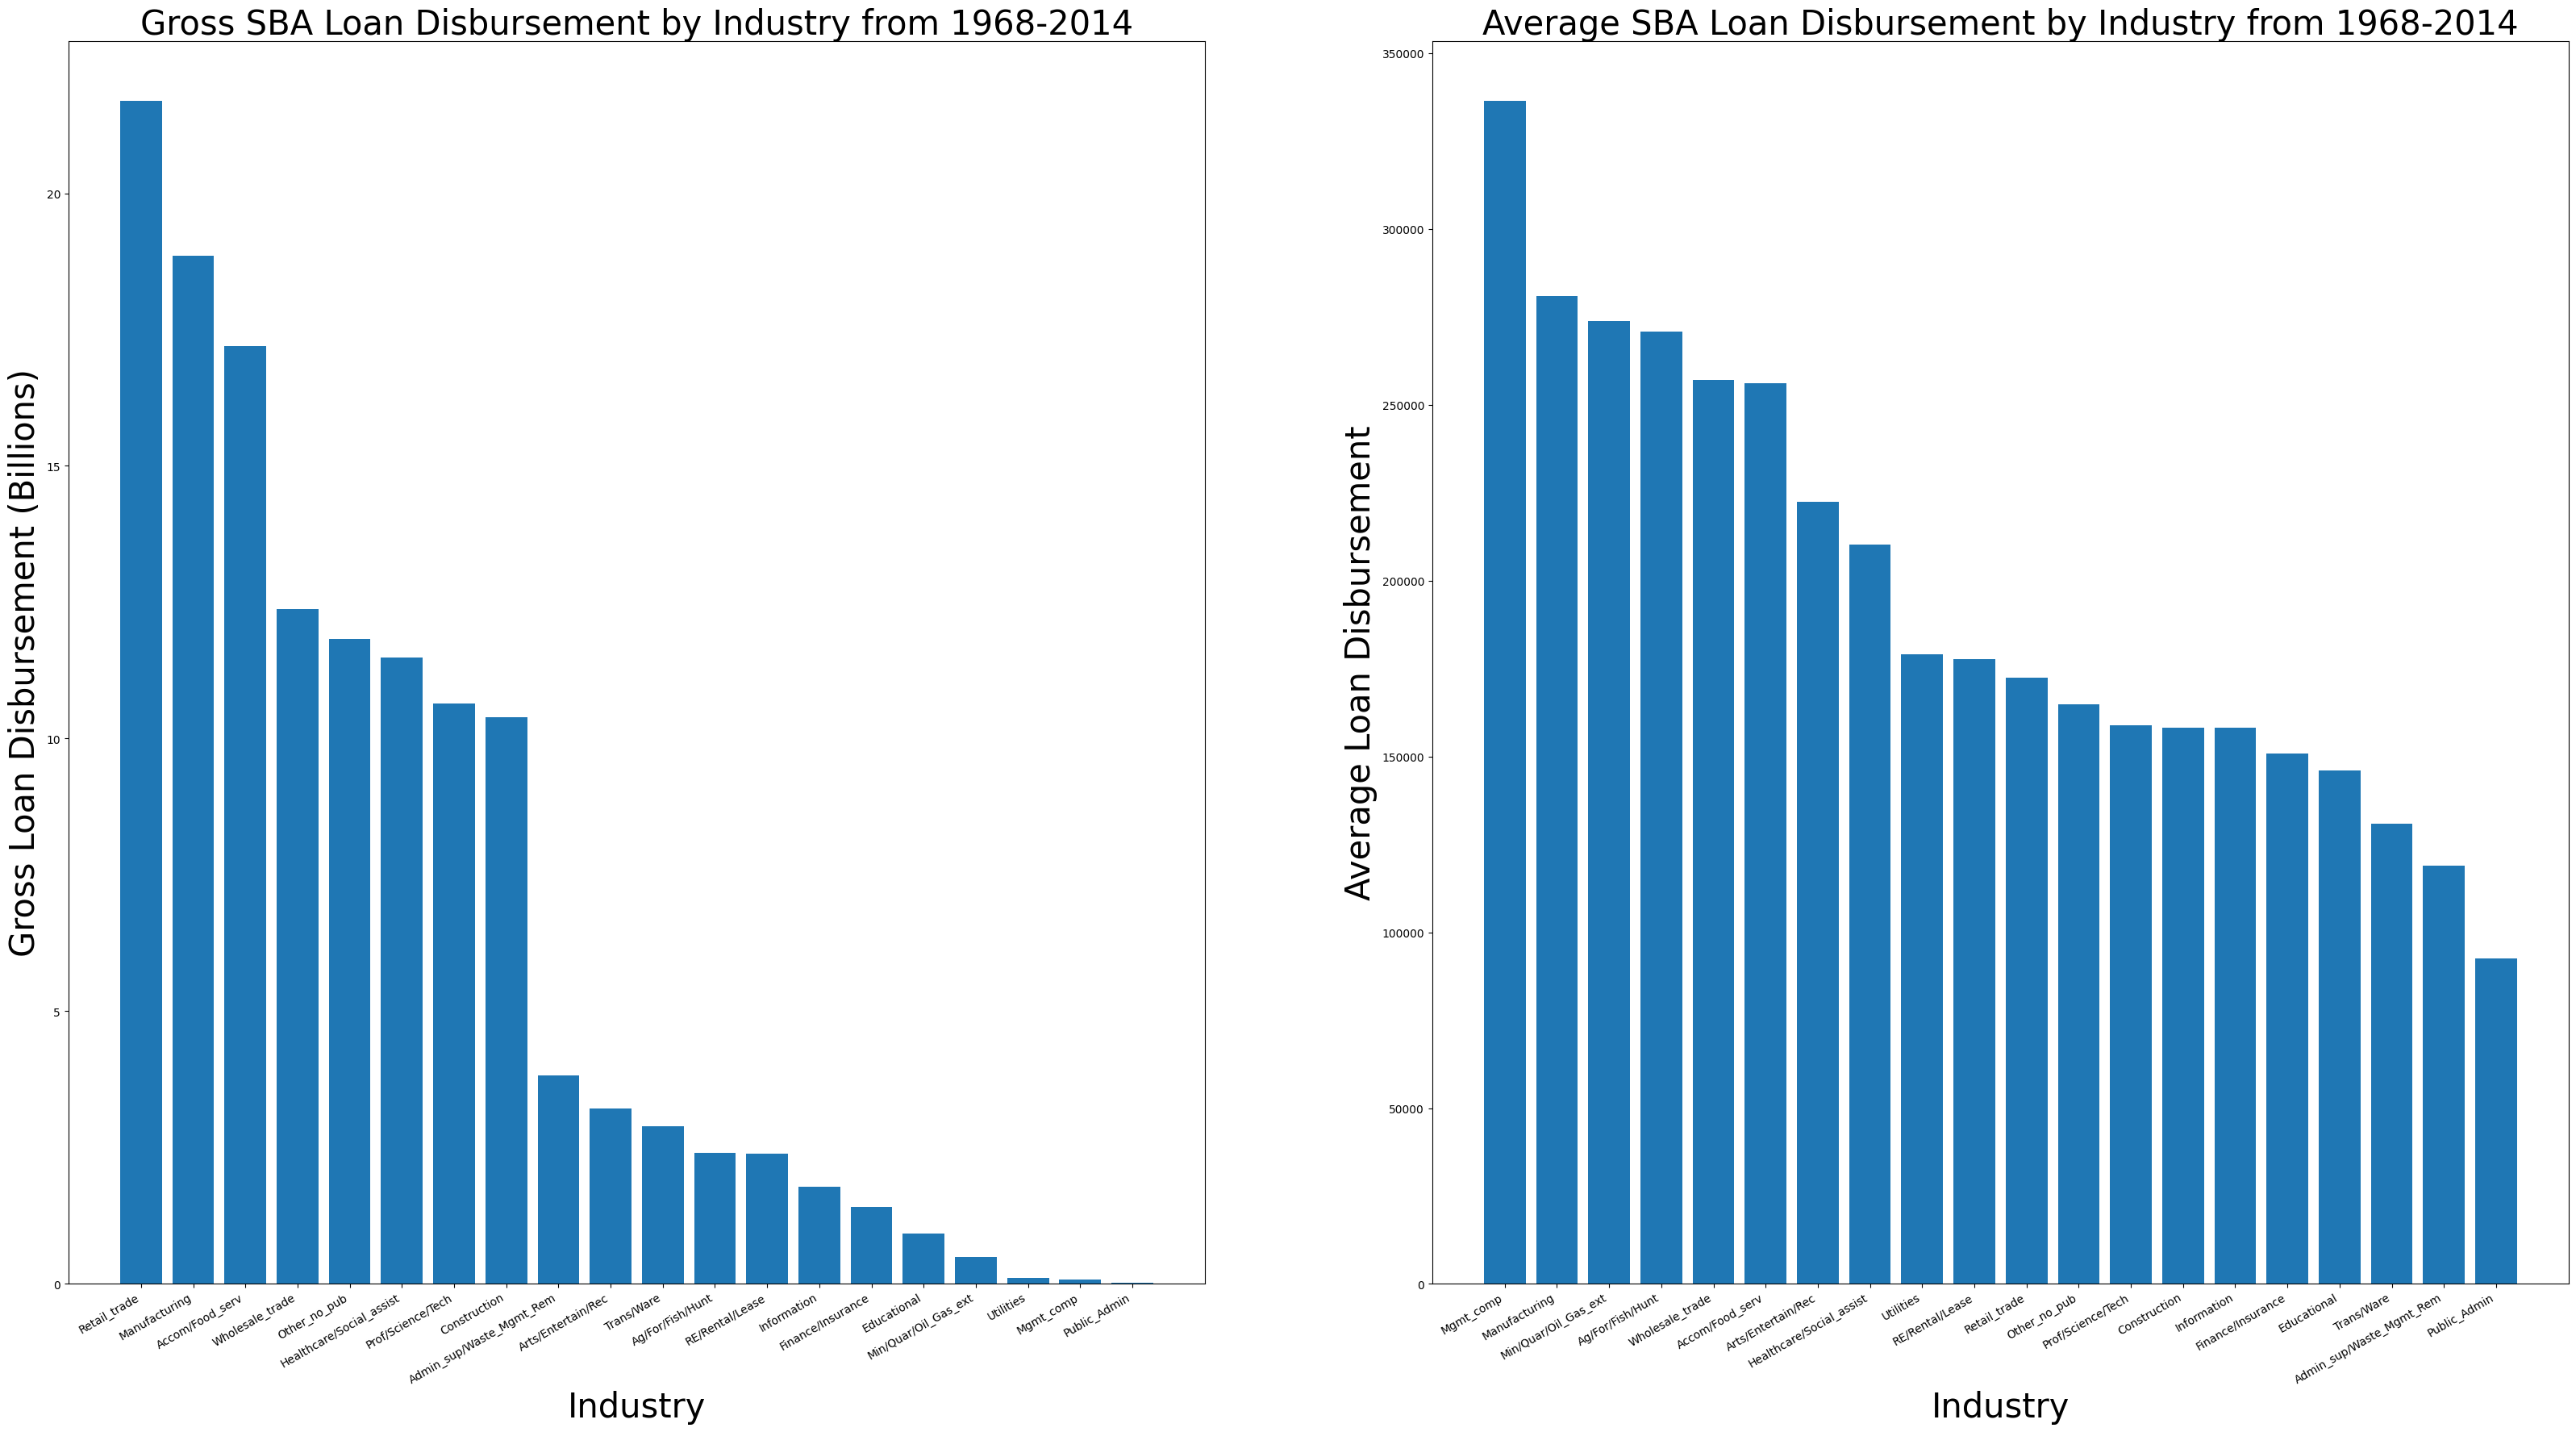

In [ ]:
industry_group = df.groupby(['Industry'])

df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending = False)
df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

fig = plt.figure(figsize=(40,20))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1968-2014', fontsize=30)
ax1.set_xlabel('Industry', fontsize = 30)
ax1.set_ylabel('Gross Loan Disbursement (Billions)', fontsize = 30)

ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1968-2014', fontsize=30)
ax2.set_xlabel('Industry',  fontsize = 30)
ax2.set_ylabel('Average Loan Disbursement',  fontsize = 30)


plt.show()

<ipython-input-36-0452233f1812>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,


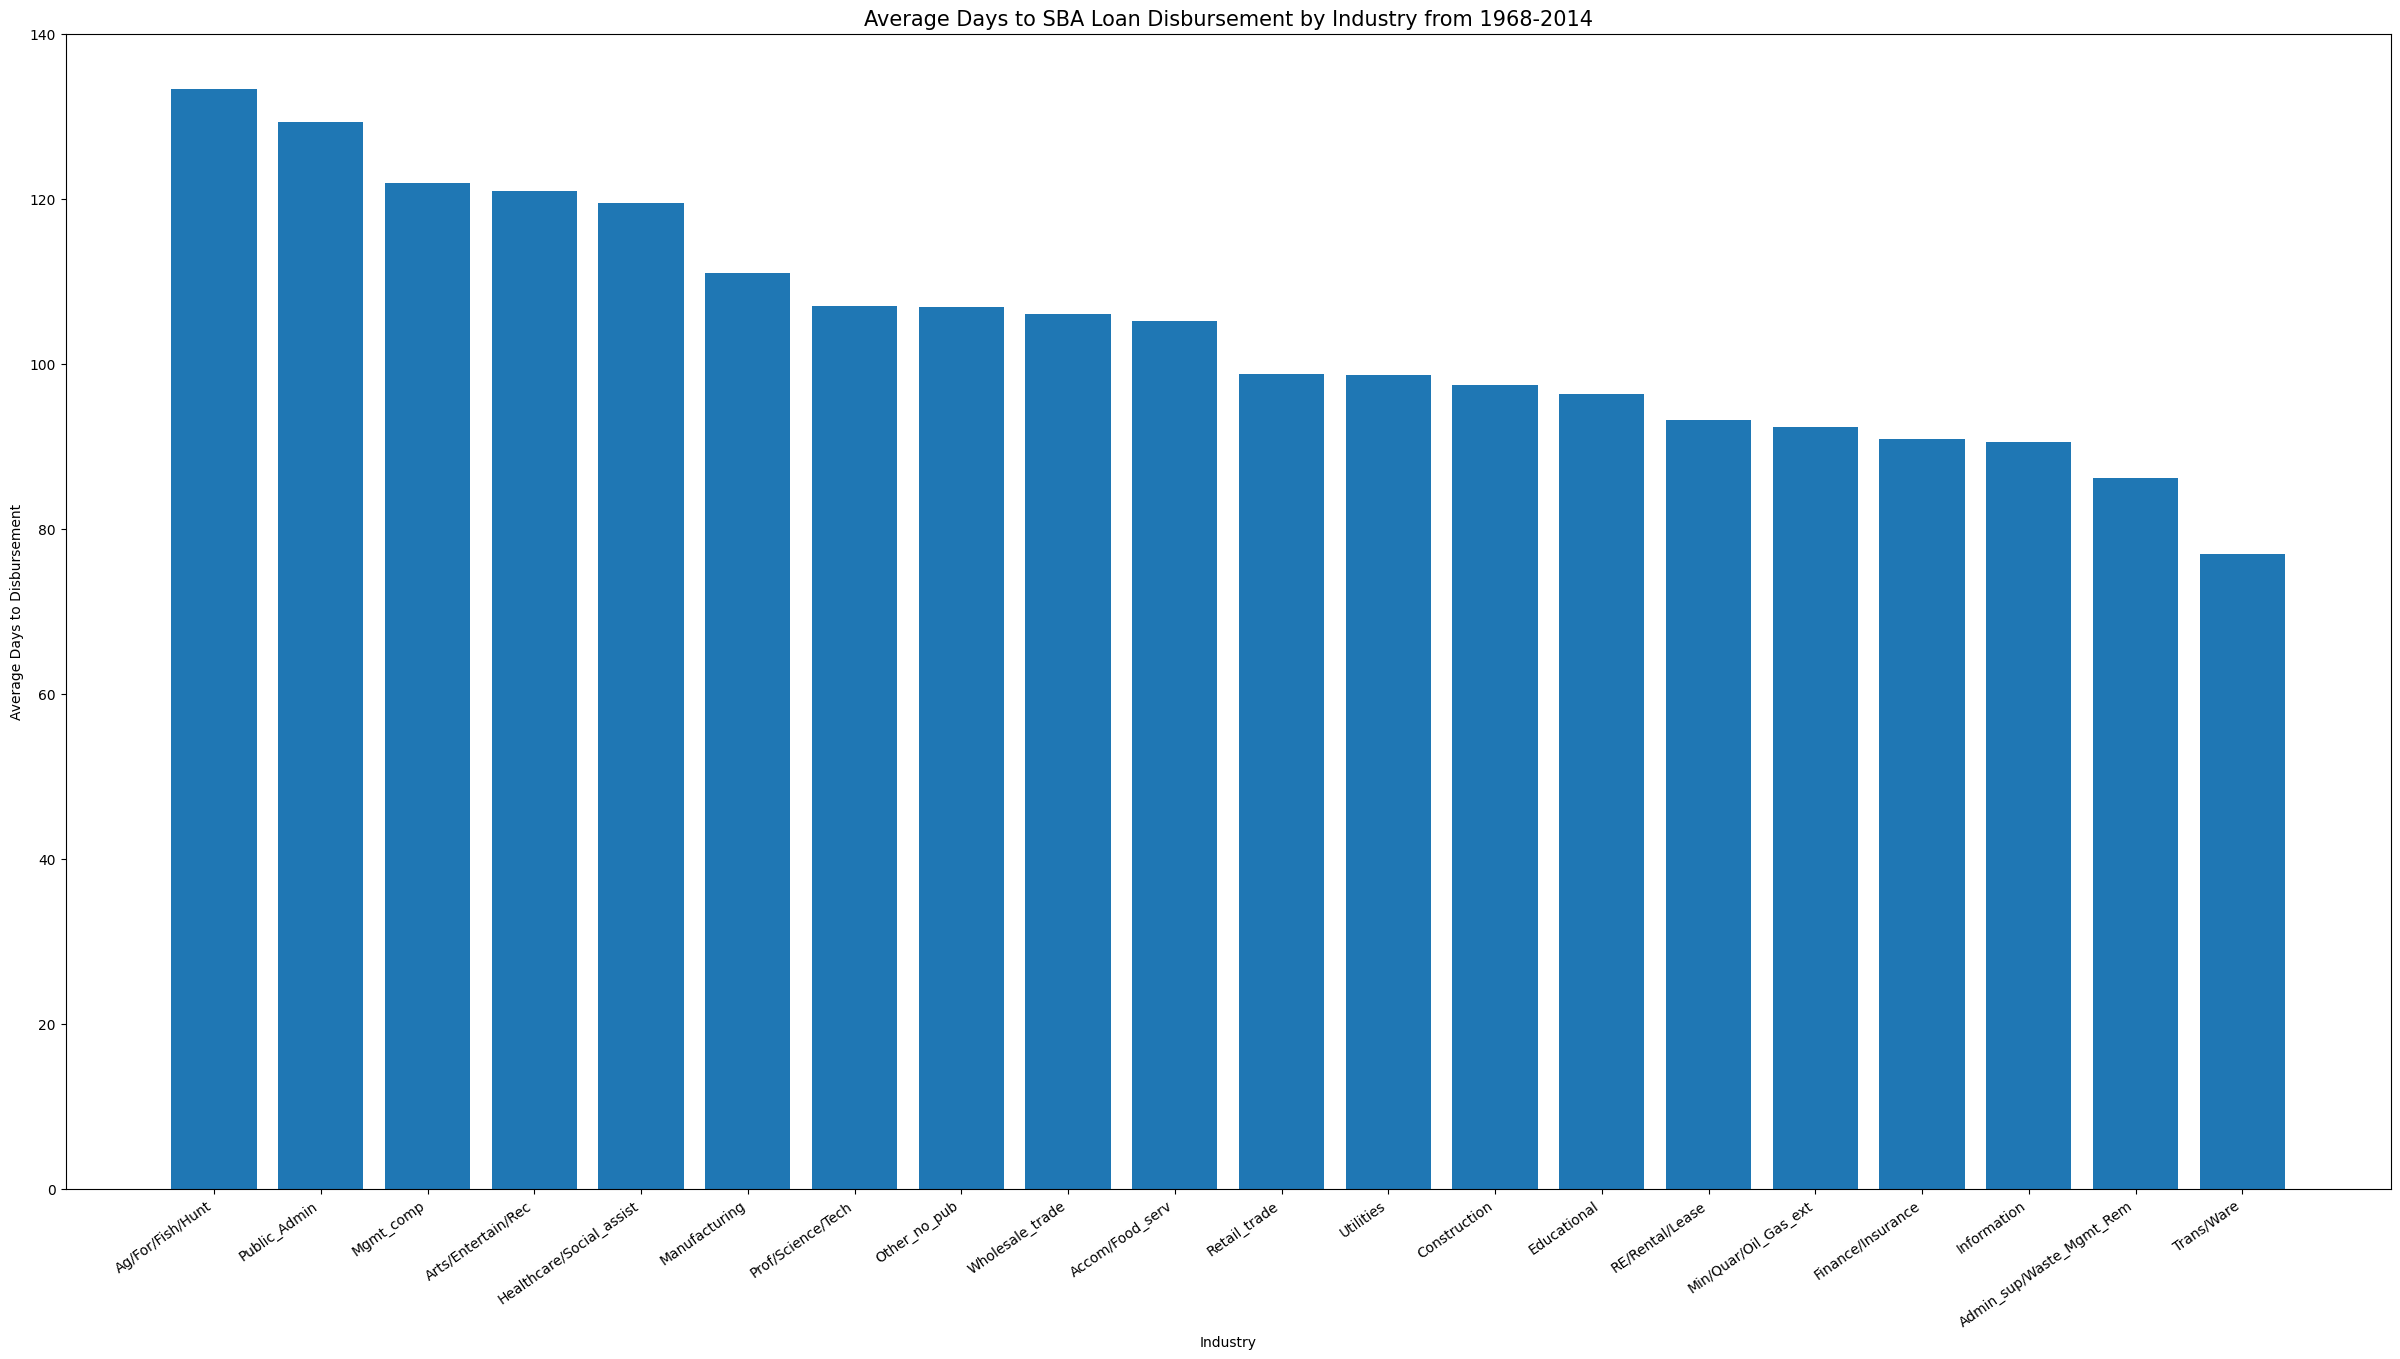

In [ ]:
fig2, ax = plt.subplots(figsize = (30,15))

ax.bar(df_industryAve.index, df_industryAve['DaysToDisbursement'].sort_values(ascending=False))
ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,
                   horizontalalignment='right', fontsize=10)

ax.set_title('Average Days to SBA Loan Disbursement by Industry from 1968-2014', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Days to Disbursement')

plt.show()

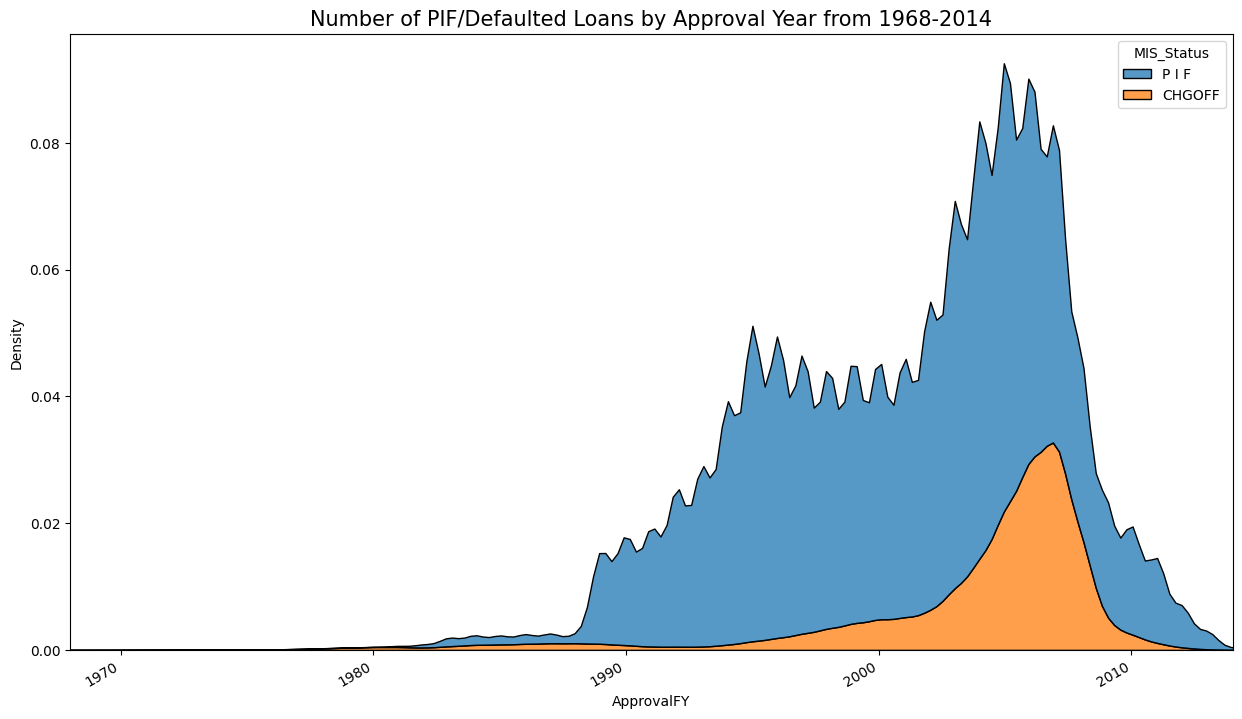

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15,8))
sns.kdeplot(x = df.ApprovalFY, hue=df.MIS_Status, multiple="stack", ax=ax)
ax.set_title('Number of PIF/Defaulted Loans by Approval Year from 1968-2014', fontsize=15)
plt.xticks(rotation = 30, fontsize = 10, horizontalalignment='right')
plt.xlim(1968,2014)
plt.show()
# ax.set_xticklabels(rotation=30, horizontalalignment='right', fontsize=10)

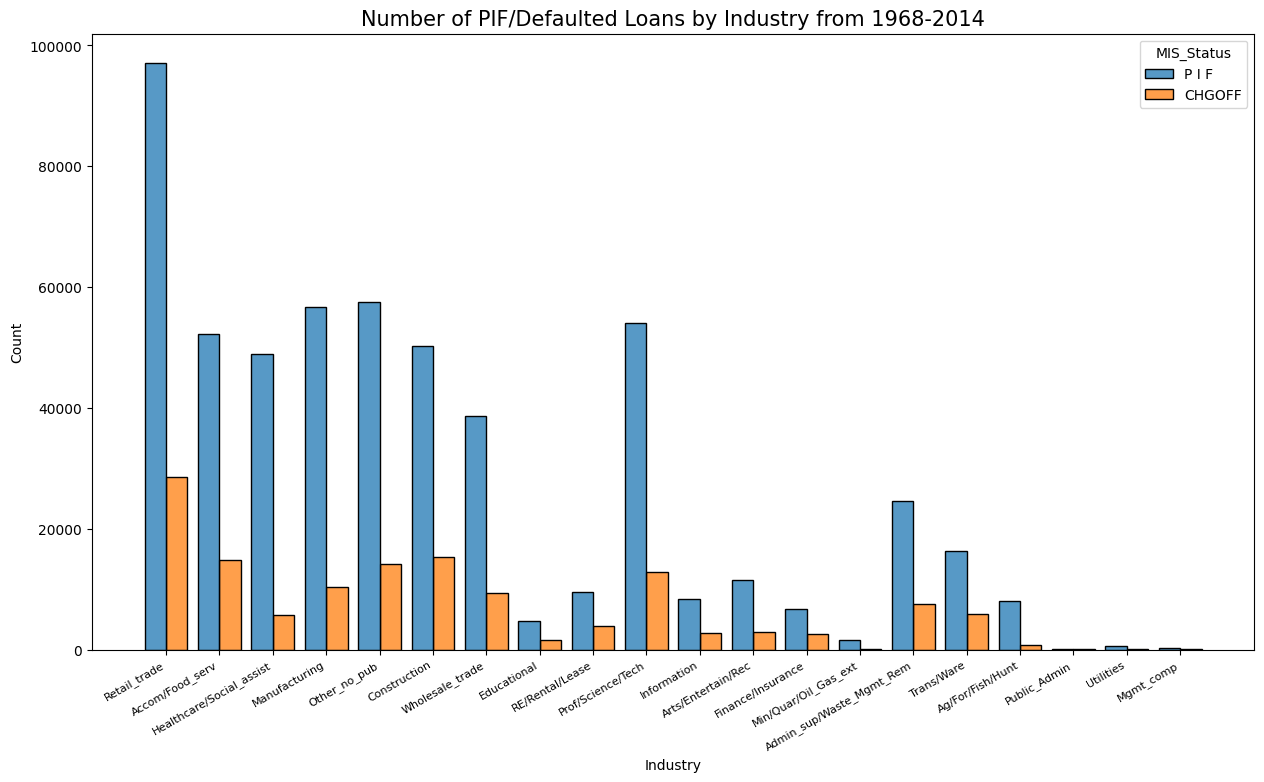

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15,8))
sns.histplot(data=df, x="Industry", hue="MIS_Status", multiple="dodge", shrink=.8, ax=ax)
ax.set_title('Number of PIF/Defaulted Loans by Industry from 1968-2014', fontsize=15)
plt.xticks(rotation = 30, fontsize = 8, horizontalalignment='right')
plt.show()
# ax.set_xticklabels(rotation=30, horizontalalignment='right', fontsize=10)

<ipython-input-26-24e08172e8fb>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1a.set_xticklabels(df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,


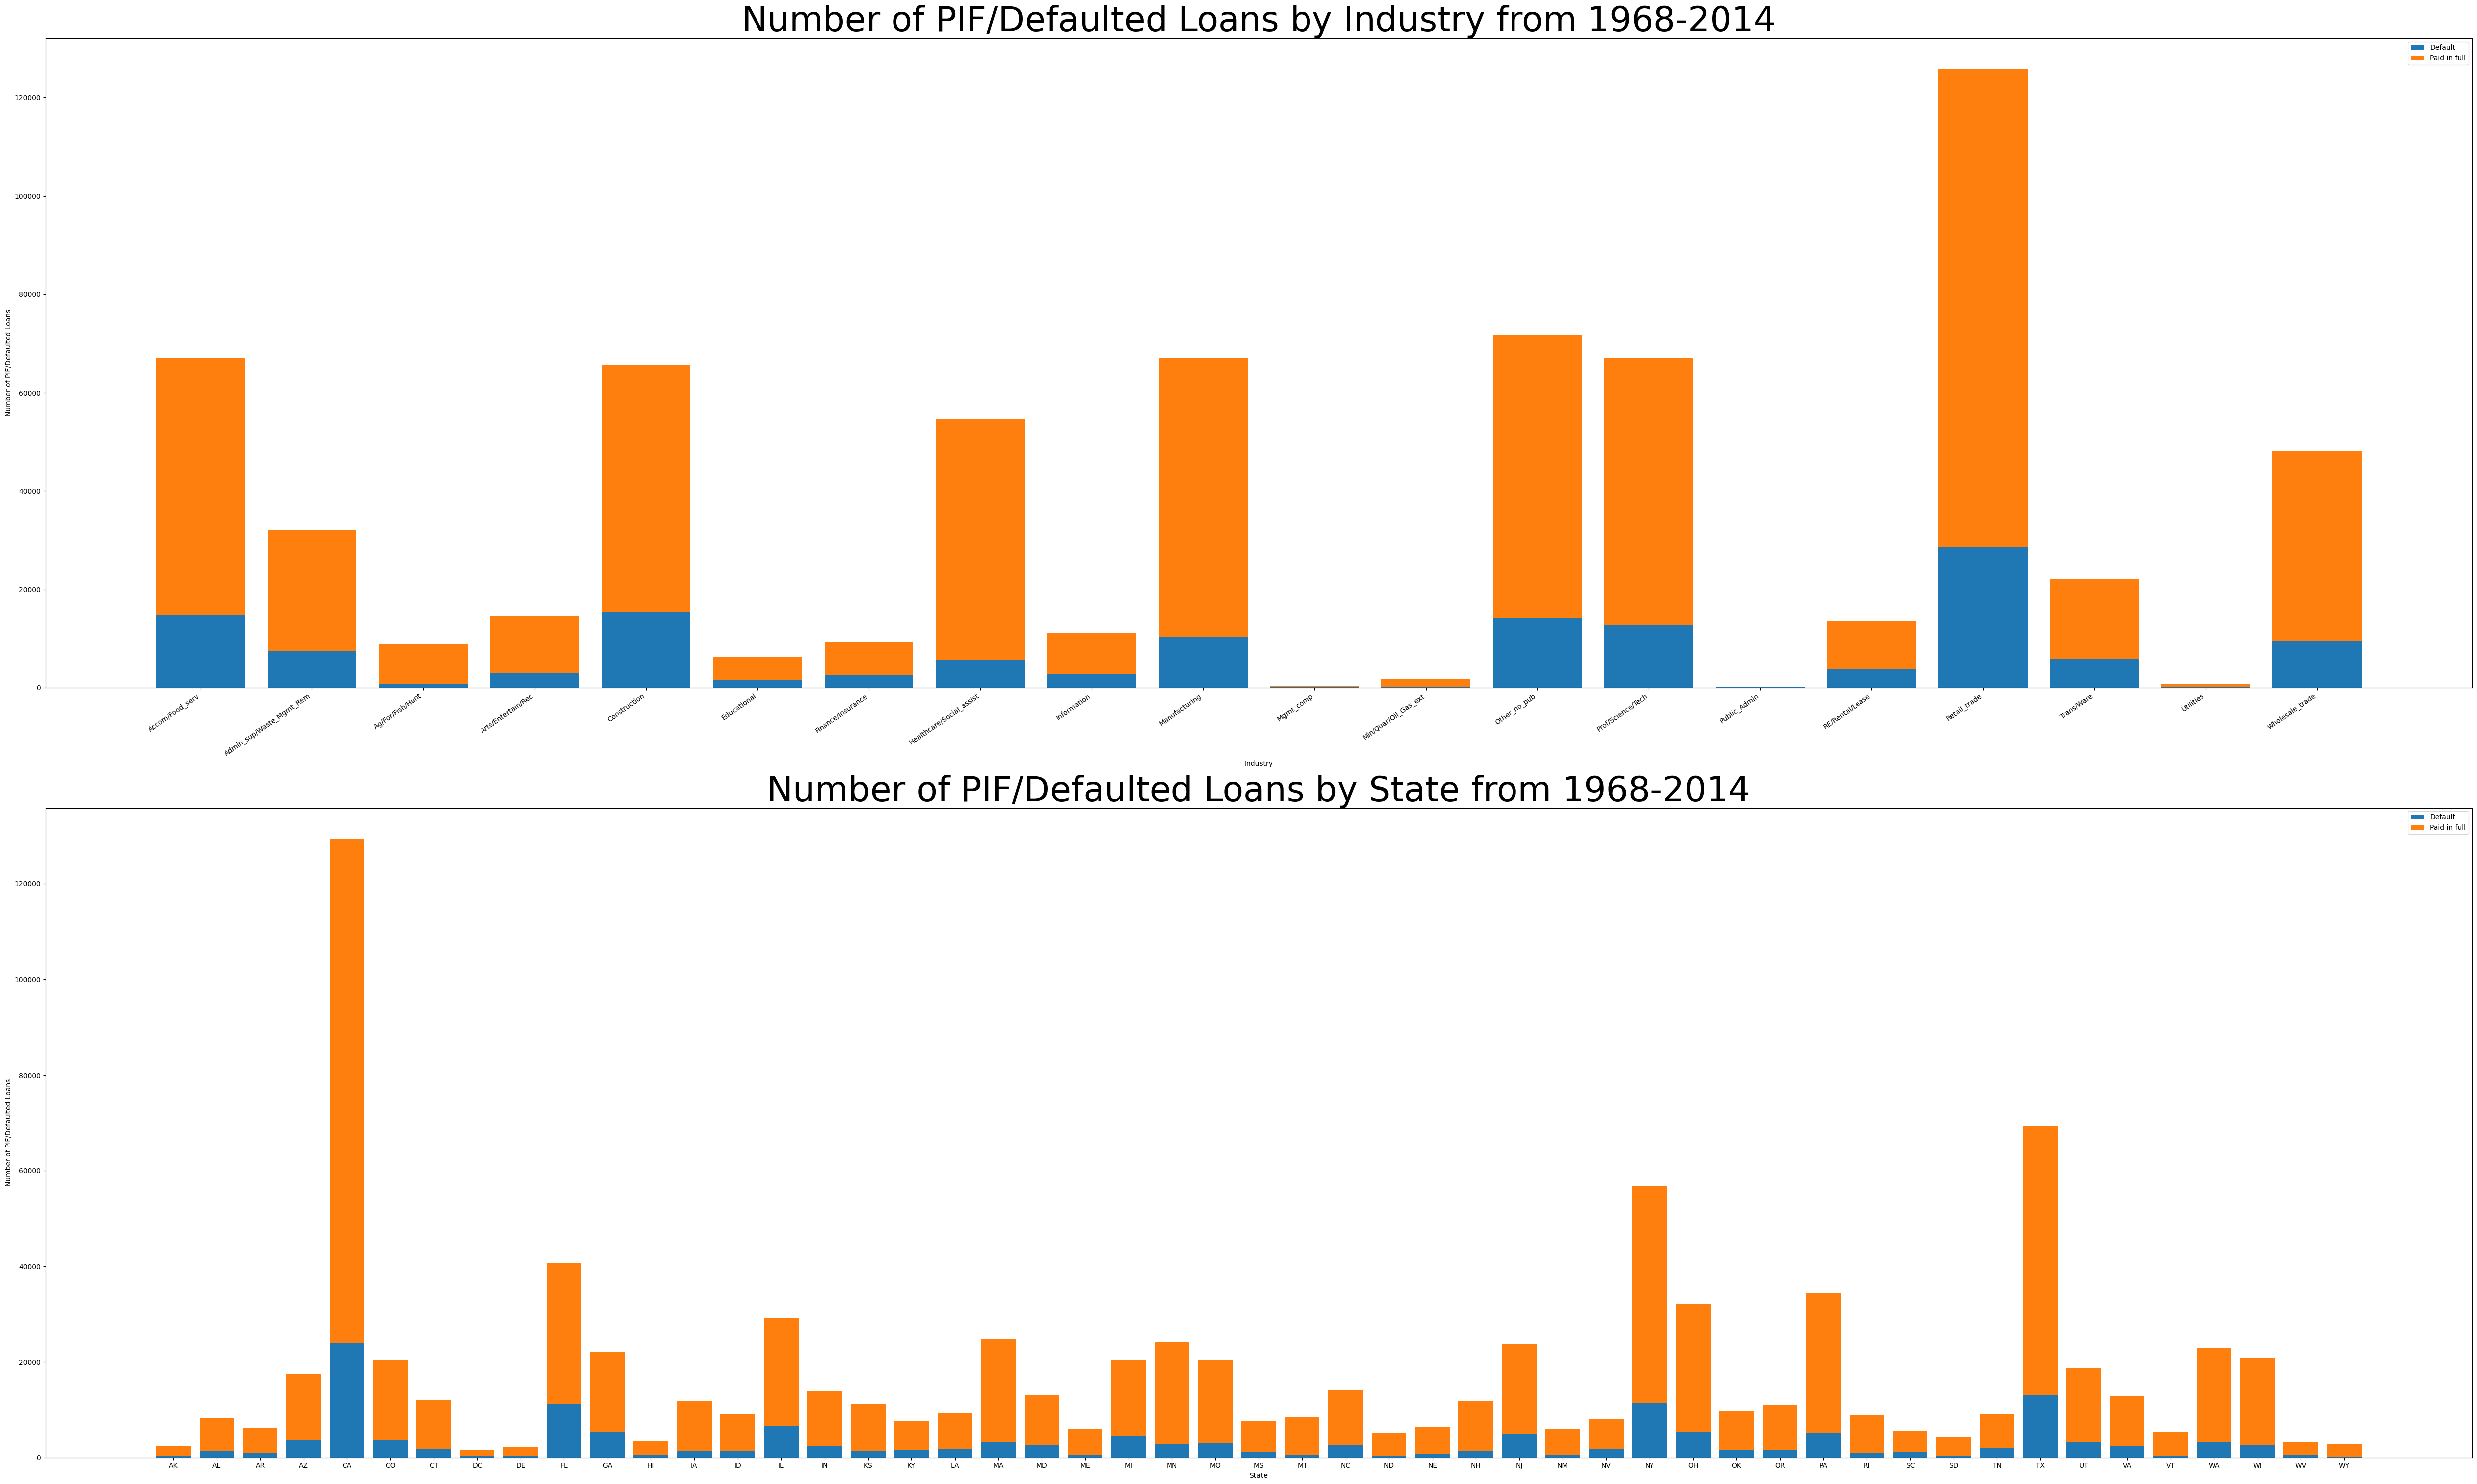

In [ ]:
fig3 = plt.figure(figsize=(50, 30))

ax1a = plt.subplot(2,1,1)
ax2a = plt.subplot(2,1,2)

def stacked_setup(df, col, axes, stack_col='Default'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    axes.bar(data.index, data[1], label='Default')
    axes.bar(data.index, data[0], bottom=data[1], label='Paid in full')


# Number of Paid in full and defaulted loans by industry
stacked_setup(df=df, col='Industry', axes=ax1a)
ax1a.set_xticklabels(df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Number of PIF/Defaulted Loans by Industry from 1968-2014', fontsize=50)
ax1a.set_xlabel('Industry')
ax1a.set_ylabel('Number of PIF/Defaulted Loans')
ax1a.legend()

# Number of Paid in full and defaulted loans by State
stacked_setup(df=df, col='State', axes=ax2a)

ax2a.set_title('Number of PIF/Defaulted Loans by State from 1968-2014', fontsize= 50)
ax2a.set_xlabel('State')
ax2a.set_ylabel('Number of PIF/Defaulted Loans')
ax2a.legend()

plt.tight_layout()
plt.show()

In [ ]:
def_ind = df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
def_ind['Def_Percent'] = def_ind[1]/(def_ind[1] + def_ind[0])

def_ind

Default,0,1,Def_Percent
Industry,,,
Accom/Food_serv,52306,14778,0.220291
Admin_sup/Waste_Mgmt_Rem,24544,7570,0.235723
Ag/For/Fish/Hunt,8062,806,0.090889
Arts/Entertain/Rec,11472,2988,0.206639
Construction,50314,15321,0.233427
Educational,4793,1520,0.240773
Finance/Insurance,6724,2654,0.283003
Healthcare/Social_assist,48951,5682,0.104003
Information,8430,2790,0.248663


In [ ]:
def_state = df.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])

def_state

Default,0,1,Def_Percent
State,,,
AK,2091,269,0.113983
AL,6879,1369,0.165980
AR,5180,1053,0.168940
AZ,13815,3616,0.207447
CA,105411,23987,0.185374
CO,16705,3637,0.178793
CT,10314,1687,0.140572
DC,1217,382,0.238899
DE,1774,387,0.179084
